In [52]:
import glob
import cv2

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [5]:
X = []
y = []

for i in range(1, 18):
    path = 'jpg/' + str(i) + '/*.jpg'
    files = glob.glob(path)

    for f in tqdm(files):
        image = cv2.imread(f)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = resize(image, (32,32,3))
        X.append(image)
        y.append(str(i))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:04<00:00, 17.93it/s]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

In [21]:
model = tf.keras.Sequential()

In [22]:
model.add(layers.Conv2D(32, (5, 5),
          activation='relu',
          input_shape=(32, 32, 3)
                        )
        )

In [23]:
model.add(layers.MaxPooling2D(pool_size=(2, 2))
        )

In [13]:
model.add(layers.Conv2D(32, (5, 5),
                        activation='relu',
                        data_format='channels_first')
        )

In [14]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(layers.Flatten())

In [25]:
model.add(layers.Dense(64, 
                       activation='relu')
        )

In [26]:
model.add(layers.Dense(17, 
                       activation='softmax')
        )

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401472    
                                                                 
 dense_3 (Dense)             (None, 17)                1105      
                                                                 
Total params: 405,009
Trainable params: 405,009
Non-trainable params: 0
________________________________________________

In [29]:
res = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=1000, validation_split=0.3)

Epoch 1/1000
24/24 [==============================] - 1s 21ms/step - loss: 2.8334 - accuracy: 0.0512 - val_loss: 2.8318 - val_accuracy: 0.0489
Epoch 2/1000
24/24 [==============================] - 0s 15ms/step - loss: 2.8313 - accuracy: 0.0591 - val_loss: 2.8277 - val_accuracy: 0.0734
Epoch 3/1000
24/24 [==============================] - 0s 14ms/step - loss: 2.8227 - accuracy: 0.0946 - val_loss: 2.8144 - val_accuracy: 0.1376
Epoch 4/1000
24/24 [==============================] - 0s 16ms/step - loss: 2.8027 - accuracy: 0.1130 - val_loss: 2.7841 - val_accuracy: 0.1560
Epoch 5/1000
24/24 [==============================] - 0s 15ms/step - loss: 2.7604 - accuracy: 0.1432 - val_loss: 2.7235 - val_accuracy: 0.1223
Epoch 6/1000
24/24 [==============================] - 0s 14ms/step - loss: 2.7004 - accuracy: 0.1314 - val_loss: 2.6407 - val_accuracy: 0.1346
Epoch 7/1000
24/24 [==============================] - 0s 15ms/step - loss: 2.6113 - accuracy: 0.1537 - val_loss: 2.5715 - val_accuracy: 0.1560

Epoch 58/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.5068 - accuracy: 0.4796 - val_loss: 1.6845 - val_accuracy: 0.4159
Epoch 59/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.4971 - accuracy: 0.5020 - val_loss: 1.7070 - val_accuracy: 0.3761
Epoch 60/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.4930 - accuracy: 0.4901 - val_loss: 1.6841 - val_accuracy: 0.4037
Epoch 61/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.4910 - accuracy: 0.5164 - val_loss: 1.6693 - val_accuracy: 0.4281
Epoch 62/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.4768 - accuracy: 0.5230 - val_loss: 1.6709 - val_accuracy: 0.4128
Epoch 63/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.4748 - accuracy: 0.5151 - val_loss: 1.6684 - val_accuracy: 0.4343
Epoch 64/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.4642 - accuracy: 0.5151 - val_loss: 1.6779 - val_accuracy:

Epoch 115/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.2114 - accuracy: 0.6084 - val_loss: 1.6186 - val_accuracy: 0.4312
Epoch 116/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.2106 - accuracy: 0.6045 - val_loss: 1.6286 - val_accuracy: 0.4434
Epoch 117/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.1944 - accuracy: 0.6216 - val_loss: 1.6366 - val_accuracy: 0.4343
Epoch 118/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.1926 - accuracy: 0.6110 - val_loss: 1.6207 - val_accuracy: 0.4434
Epoch 119/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.1899 - accuracy: 0.6110 - val_loss: 1.6352 - val_accuracy: 0.4343
Epoch 120/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.1965 - accuracy: 0.6189 - val_loss: 1.6190 - val_accuracy: 0.4465
Epoch 121/1000
24/24 [==============================] - 0s 14ms/step - loss: 1.1813 - accuracy: 0.6110 - val_loss: 1.6100 - val_ac

24/24 [==============================] - 0s 14ms/step - loss: 0.9439 - accuracy: 0.7083 - val_loss: 1.6415 - val_accuracy: 0.4465
Epoch 172/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.9404 - accuracy: 0.7017 - val_loss: 1.6289 - val_accuracy: 0.4526
Epoch 173/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.9347 - accuracy: 0.7240 - val_loss: 1.6241 - val_accuracy: 0.4526
Epoch 174/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.9158 - accuracy: 0.7240 - val_loss: 1.6340 - val_accuracy: 0.4648
Epoch 175/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.9130 - accuracy: 0.7254 - val_loss: 1.6330 - val_accuracy: 0.4771
Epoch 176/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.9149 - accuracy: 0.7148 - val_loss: 1.6633 - val_accuracy: 0.4526
Epoch 177/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.9149 - accuracy: 0.7175 - val_loss: 1.6312 - val_accuracy: 0.4557


24/24 [==============================] - 0s 15ms/step - loss: 0.6911 - accuracy: 0.8029 - val_loss: 1.6846 - val_accuracy: 0.4740
Epoch 228/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.6849 - accuracy: 0.8108 - val_loss: 1.6870 - val_accuracy: 0.4801
Epoch 229/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.6807 - accuracy: 0.8187 - val_loss: 1.7296 - val_accuracy: 0.4648
Epoch 230/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.6855 - accuracy: 0.7884 - val_loss: 1.6770 - val_accuracy: 0.4648
Epoch 231/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.6628 - accuracy: 0.8200 - val_loss: 1.7196 - val_accuracy: 0.4557
Epoch 232/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.6742 - accuracy: 0.7858 - val_loss: 1.7027 - val_accuracy: 0.4648
Epoch 233/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.6645 - accuracy: 0.8055 - val_loss: 1.7013 - val_accuracy: 0.4862


24/24 [==============================] - 0s 15ms/step - loss: 0.4859 - accuracy: 0.8699 - val_loss: 1.7835 - val_accuracy: 0.4771
Epoch 284/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.4972 - accuracy: 0.8555 - val_loss: 1.7775 - val_accuracy: 0.4893
Epoch 285/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.4872 - accuracy: 0.8699 - val_loss: 1.7947 - val_accuracy: 0.4954
Epoch 286/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.4845 - accuracy: 0.8686 - val_loss: 1.7728 - val_accuracy: 0.4862
Epoch 287/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.4747 - accuracy: 0.8725 - val_loss: 1.7910 - val_accuracy: 0.4771
Epoch 288/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.4747 - accuracy: 0.8660 - val_loss: 1.8072 - val_accuracy: 0.4709
Epoch 289/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.4752 - accuracy: 0.8673 - val_loss: 1.7947 - val_accuracy: 0.4832


24/24 [==============================] - 0s 14ms/step - loss: 0.3337 - accuracy: 0.9225 - val_loss: 1.9564 - val_accuracy: 0.4801
Epoch 340/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.3319 - accuracy: 0.9277 - val_loss: 1.9241 - val_accuracy: 0.4679
Epoch 341/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.3314 - accuracy: 0.9343 - val_loss: 1.9449 - val_accuracy: 0.4709
Epoch 342/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.3224 - accuracy: 0.9304 - val_loss: 1.9554 - val_accuracy: 0.4801
Epoch 343/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.3181 - accuracy: 0.9330 - val_loss: 1.9562 - val_accuracy: 0.4740
Epoch 344/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.3223 - accuracy: 0.9317 - val_loss: 1.9834 - val_accuracy: 0.4679
Epoch 345/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.3208 - accuracy: 0.9382 - val_loss: 1.9873 - val_accuracy: 0.4679


24/24 [==============================] - 0s 15ms/step - loss: 0.2188 - accuracy: 0.9671 - val_loss: 2.1243 - val_accuracy: 0.4679
Epoch 396/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.2137 - accuracy: 0.9658 - val_loss: 2.1216 - val_accuracy: 0.4709
Epoch 397/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.2110 - accuracy: 0.9645 - val_loss: 2.1529 - val_accuracy: 0.4740
Epoch 398/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.2027 - accuracy: 0.9724 - val_loss: 2.1577 - val_accuracy: 0.4771
Epoch 399/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.2052 - accuracy: 0.9685 - val_loss: 2.1370 - val_accuracy: 0.4618
Epoch 400/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.2119 - accuracy: 0.9671 - val_loss: 2.1753 - val_accuracy: 0.4954
Epoch 401/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.2043 - accuracy: 0.9737 - val_loss: 2.1756 - val_accuracy: 0.4679


24/24 [==============================] - 0s 14ms/step - loss: 0.1280 - accuracy: 0.9895 - val_loss: 2.4144 - val_accuracy: 0.4771
Epoch 452/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.1258 - accuracy: 0.9895 - val_loss: 2.4271 - val_accuracy: 0.4801
Epoch 453/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.1245 - accuracy: 0.9908 - val_loss: 2.4151 - val_accuracy: 0.4771
Epoch 454/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.1234 - accuracy: 0.9908 - val_loss: 2.4122 - val_accuracy: 0.4740
Epoch 455/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.1220 - accuracy: 0.9908 - val_loss: 2.4408 - val_accuracy: 0.4771
Epoch 456/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.1223 - accuracy: 0.9908 - val_loss: 2.4403 - val_accuracy: 0.4832
Epoch 457/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.1208 - accuracy: 0.9895 - val_loss: 2.4338 - val_accuracy: 0.4709


24/24 [==============================] - 0s 15ms/step - loss: 0.0766 - accuracy: 0.9961 - val_loss: 2.7442 - val_accuracy: 0.4771
Epoch 508/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0745 - accuracy: 0.9974 - val_loss: 2.7047 - val_accuracy: 0.4771
Epoch 509/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0772 - accuracy: 0.9961 - val_loss: 2.7921 - val_accuracy: 0.4832
Epoch 510/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0702 - accuracy: 0.9961 - val_loss: 2.7304 - val_accuracy: 0.4709
Epoch 511/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0692 - accuracy: 0.9974 - val_loss: 2.7372 - val_accuracy: 0.4709
Epoch 512/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0681 - accuracy: 0.9961 - val_loss: 2.7792 - val_accuracy: 0.4924
Epoch 513/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0695 - accuracy: 0.9961 - val_loss: 2.7547 - val_accuracy: 0.4801


24/24 [==============================] - 0s 16ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 3.0387 - val_accuracy: 0.4832
Epoch 564/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 3.0373 - val_accuracy: 0.4618
Epoch 565/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 3.0734 - val_accuracy: 0.4832
Epoch 566/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0387 - accuracy: 0.9987 - val_loss: 3.0331 - val_accuracy: 0.4771
Epoch 567/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 3.0579 - val_accuracy: 0.4709
Epoch 568/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 3.0715 - val_accuracy: 0.4709
Epoch 569/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 3.0946 - val_accuracy: 0.4709


24/24 [==============================] - 0s 15ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 3.4205 - val_accuracy: 0.4862
Epoch 620/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 3.4123 - val_accuracy: 0.4648
Epoch 621/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 3.3770 - val_accuracy: 0.4771
Epoch 622/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 3.4116 - val_accuracy: 0.4771
Epoch 623/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 3.4201 - val_accuracy: 0.4801
Epoch 624/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 3.4390 - val_accuracy: 0.4862
Epoch 625/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 3.4482 - val_accuracy: 0.4801


24/24 [==============================] - 0s 14ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 3.7515 - val_accuracy: 0.4801
Epoch 676/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 3.7509 - val_accuracy: 0.4801
Epoch 677/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 3.7679 - val_accuracy: 0.4771
Epoch 678/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.8144 - val_accuracy: 0.4771
Epoch 679/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 3.7677 - val_accuracy: 0.4709
Epoch 680/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 3.7760 - val_accuracy: 0.4771
Epoch 681/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 3.7774 - val_accuracy: 0.4648


24/24 [==============================] - 0s 15ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 4.1148 - val_accuracy: 0.4771
Epoch 732/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 4.1373 - val_accuracy: 0.4832
Epoch 733/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 4.1322 - val_accuracy: 0.4679
Epoch 734/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 4.1423 - val_accuracy: 0.4709
Epoch 735/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 4.1671 - val_accuracy: 0.4740
Epoch 736/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 4.1549 - val_accuracy: 0.4771
Epoch 737/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 4.1465 - val_accuracy: 0.4771


24/24 [==============================] - 0s 15ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.4877 - val_accuracy: 0.4709
Epoch 788/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.4877 - val_accuracy: 0.4771
Epoch 789/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.5078 - val_accuracy: 0.4648
Epoch 790/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.5058 - val_accuracy: 0.4648
Epoch 791/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.5464 - val_accuracy: 0.4709
Epoch 792/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.5614 - val_accuracy: 0.4771
Epoch 793/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.5069 - val_accuracy: 0.4709


24/24 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.8393 - val_accuracy: 0.4679
Epoch 844/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.8724 - val_accuracy: 0.4709
Epoch 845/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.8797 - val_accuracy: 0.4771
Epoch 846/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.8821 - val_accuracy: 0.4801
Epoch 847/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.9023 - val_accuracy: 0.4679
Epoch 848/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.8809 - val_accuracy: 0.4679
Epoch 849/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.9110 - val_accuracy: 0.4801


Epoch 899/1000
24/24 [==============================] - 0s 15ms/step - loss: 7.8604e-04 - accuracy: 1.0000 - val_loss: 5.2861 - val_accuracy: 0.4771
Epoch 900/1000
24/24 [==============================] - 0s 15ms/step - loss: 7.7528e-04 - accuracy: 1.0000 - val_loss: 5.2455 - val_accuracy: 0.4679
Epoch 901/1000
24/24 [==============================] - 0s 15ms/step - loss: 8.1002e-04 - accuracy: 1.0000 - val_loss: 5.2340 - val_accuracy: 0.4801
Epoch 902/1000
24/24 [==============================] - 0s 14ms/step - loss: 7.7079e-04 - accuracy: 1.0000 - val_loss: 5.2746 - val_accuracy: 0.4771
Epoch 903/1000
24/24 [==============================] - 0s 15ms/step - loss: 7.0568e-04 - accuracy: 1.0000 - val_loss: 5.2804 - val_accuracy: 0.4740
Epoch 904/1000
24/24 [==============================] - 0s 15ms/step - loss: 7.1113e-04 - accuracy: 1.0000 - val_loss: 5.2682 - val_accuracy: 0.4709
Epoch 905/1000
24/24 [==============================] - 0s 16ms/step - loss: 6.9420e-04 - accuracy: 1.0000

Epoch 954/1000
24/24 [==============================] - 0s 15ms/step - loss: 3.8273e-04 - accuracy: 1.0000 - val_loss: 5.6061 - val_accuracy: 0.4679
Epoch 955/1000
24/24 [==============================] - 0s 15ms/step - loss: 4.0021e-04 - accuracy: 1.0000 - val_loss: 5.6810 - val_accuracy: 0.4709
Epoch 956/1000
24/24 [==============================] - 0s 14ms/step - loss: 3.8437e-04 - accuracy: 1.0000 - val_loss: 5.6611 - val_accuracy: 0.4679
Epoch 957/1000
24/24 [==============================] - 0s 14ms/step - loss: 4.1995e-04 - accuracy: 1.0000 - val_loss: 5.6956 - val_accuracy: 0.4709
Epoch 958/1000
24/24 [==============================] - 0s 14ms/step - loss: 3.7951e-04 - accuracy: 1.0000 - val_loss: 5.6698 - val_accuracy: 0.4740
Epoch 959/1000
24/24 [==============================] - 0s 14ms/step - loss: 3.8041e-04 - accuracy: 1.0000 - val_loss: 5.6966 - val_accuracy: 0.4801
Epoch 960/1000
24/24 [==============================] - 0s 15ms/step - loss: 3.6406e-04 - accuracy: 1.0000

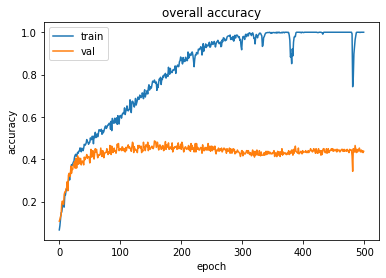

In [54]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('overall accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

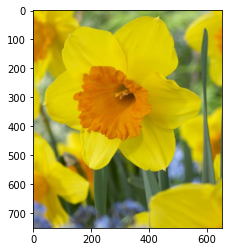

In [57]:
img_1 = plt.imread('1.jpg')
img_1_show = plt.imshow(img_1)

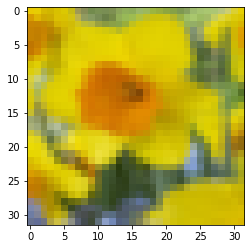

In [58]:
img_1_res = resize(img_1, (32,32,3))
img_1_show = plt.imshow(img_1_res)

In [60]:
probs = model.predict(np.array([img_1_res]))
probs

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

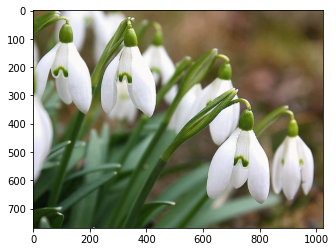

In [64]:
img_2 = plt.imread('2_2.jpg')
img_2_show = plt.imshow(img_2)

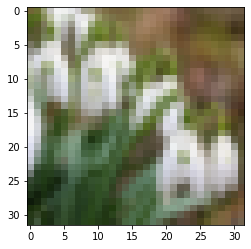

In [65]:
img_2_res = resize(img_2, (32,32,3))
img_2_show = plt.imshow(img_2_res)

In [66]:
probs = model.predict(np.array([img_2_res]))
probs

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

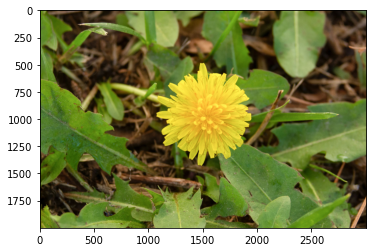

In [76]:
img_13 = plt.imread('13.jpg')
img_13_show = plt.imshow(img_13)

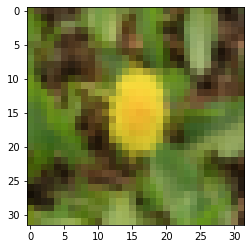

In [78]:
img_13_res = resize(img_13, (32,32,3))
img_13_show = plt.imshow(img_13_res)

In [79]:
probs = model.predict(np.array([img_13_res]))
probs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.]], dtype=float32)

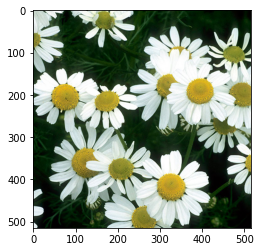

In [80]:
img_11 = plt.imread('11.jpg')
img_11_show = plt.imshow(img_11)

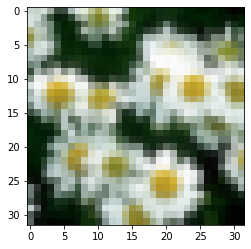

In [81]:
img_11_res = resize(img_11, (32,32,3))
img_11_show = plt.imshow(img_11_res)

In [82]:
probs = model.predict(np.array([img_11_res]))
probs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.]], dtype=float32)